In [1]:
import sys
sys.path.insert(0, "../autowrite")

In [2]:
from Iamondb import Iamondb
from Visualizer import Visualizer

In [3]:
iamondb = Iamondb("./../../data/raw_data")

In [4]:
touch_points, labels = iamondb.get_samples()

In [5]:
print(len(touch_points), len(labels))

64 64


In [6]:
i = 30
example_touch_points = touch_points[i]
example_text = labels[i]

In [7]:
visualizer = Visualizer()

May I suggest that you have


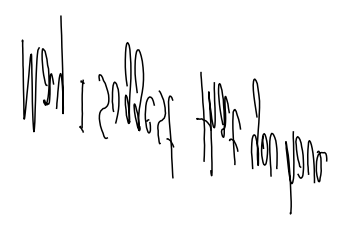

In [8]:
visualizer.plot_raw_sample(example_touch_points)
print(example_text)

In [9]:
from Preprocessor import Preprocessor

2022-06-24 10:12:13.321126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-24 10:12:13.321148: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
preprocessor = Preprocessor("../autowrite/model_data/alphabet")

In [11]:
%matplotlib qt

normalized = preprocessor.normalize_strokes(example_touch_points)
visualizer.plot_raw_sample(normalized)
print(preprocessor.decode_sample(preprocessor.encode_sample(example_text)))

['M', 'a', 'y', ' ', 'I', ' ', 's', 'u', 'g', 'g', 'e', 's', 't', ' ', 't', 'h', 'a', 't', ' ', 'y', 'o', 'u', ' ', 'h', 'a', 'v', 'e']


In [14]:
fitted_bezier_curves = preprocessor.strokes_to_bezier(example_touch_points)
visualizer.plot_bezier_curves(fitted_bezier_curves, control_points=True)

In [13]:
import sys

bezier_features = []

for i, sample in enumerate(touch_points):
    sys.stdout.write(f"\r{(float(i)/len(touch_points)*100):.2f}%")
    bezier_features.append(preprocessor.strokes_to_bezier(sample))

padded_bezier_features = preprocessor.pad_data(bezier_features, value=0, width=11)

34.38%

KeyboardInterrupt: 

In [ ]:
visualizer.plot_bezier_curves(padded_bezier_features[1000])

In [ ]:
import numpy as np
np.save("../../data/processed_data/bezier_features_padded_improved", padded_bezier_features)

In [ ]:
target = []

for i, sample in enumerate(labels):
    sys.stdout.write(f"\r{(float(i)/len(touch_points)*100):.2f}%")
    target.append(preprocessor.encode_sample(sample))

padded_target = preprocessor.pad_data(target, value=82)

In [ ]:
np.save("../../data/processed_data/target_padded", padded_target)

In [ ]:
from Encoder import Encoder

In [ ]:
Encoder("./../autowrite/model_data/weights/cp.ckpt", "./../autowrite/model_data/alphabet")